# A Lightweight Concept Drift Detection and Adaptation Framework for IoT Data Streams
This is the code for the paper entitled "**A Lightweight Concept Drift Detection and Adaptation Framework for IoT Data Streams**" accepted in IEEE Internet of Things Magazine.  
Authors: Li Yang (lyang339@uwo.ca) and Abdallah Shami (Abdallah.Shami@uwo.ca)  
Organization: The Optimized Computing and Communications (OC2) Lab, ECE Department, Western University

**Notebook 2: Static machine learning algorithms**  
Aims:  
&nbsp; 1): Find the best performing static machine learning algorithm by considering both accuracy and time  
&nbsp; 2): Obtain the optimized learner using hyperparameter optimization techniques  

In [ ]:
 from google.colab import drive
 drive.mount('/content/drive')

Mounted at /content/drive


## Import libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score, precision_score, recall_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
import lightgbm as lgb
import time
import warnings
warnings.filterwarnings("ignore")

## Read the Edge IIoT dataset

In [ ]:
#Read the training and test set
df1 = pd.read_csv("/content/drive/MyDrive/IoT_Dataset_Edge_ML.csv")

In [ ]:
df1

,arp.opcode,arp.hw.size,icmp.checksum,icmp.seq_le,icmp.unused,http.content_length,http.response,http.tls_port,tcp.ack,tcp.ack_raw,...,mqtt.len,mqtt.msg_decoded_as,mqtt.msgtype,mqtt.proto_len,mqtt.topic_len,mqtt.ver,mbtcp.len,mbtcp.trans_id,mbtcp.unit_id,Attack_label
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.213215e+09,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,6.634212e+08,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.871701e+09,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,150.0,3.369417e+09,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4.270381e+09,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152227,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
152228,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.453307e+09,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
152229,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,96979.0,2.371722e+09,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
152230,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,8.998023e+08,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [ ]:
df1.dtypes


arp.opcode                   float64
arp.hw.size                  float64
icmp.checksum                float64
icmp.seq_le                  float64
icmp.unused                  float64
http.content_length          float64
http.response                float64
http.tls_port                float64
tcp.ack                      float64
tcp.ack_raw                  float64
tcp.checksum                 float64
tcp.connection.fin           float64
tcp.connection.rst           float64
tcp.connection.syn           float64
tcp.connection.synack        float64
tcp.flags                    float64
tcp.flags.ack                float64
tcp.len                      float64
tcp.seq                      float64
udp.stream                   float64
udp.time_delta               float64
dns.qry.name                 float64
dns.qry.qu                   float64
dns.qry.type                 float64
dns.retransmission           float64
dns.retransmit_request       float64
dns.retransmit_request_in    float64
m

In [ ]:
y = df1['Attack_label']
X = df1.drop(['Attack_label'],axis=1)

In [ ]:
#X_test
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.7, test_size = 0.3, random_state = 0,shuffle=False)

## Training  static machine learning algorithm:
###  LightGBM

[LightGBM] [Info] Number of positive: 89556, number of negative: 17006
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012110 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2417
[LightGBM] [Info] Number of data points in the train set: 106562, number of used features: 28
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.840412 -> initscore=1.661298
[LightGBM] [Info] Start training from score 1.661298
              precision    recall  f1-score   support

           0       1.00      0.85      0.92      7119
           1       0.97      1.00      0.99     38551

    accuracy                           0.98     45670
   macro avg       0.99      0.92      0.95     45670
weighted avg       0.98      0.98      0.98     45670

Accuracy: 0.9761112327567331
Precision: 0.9725502068826319
Recall: 0.9999221810069777


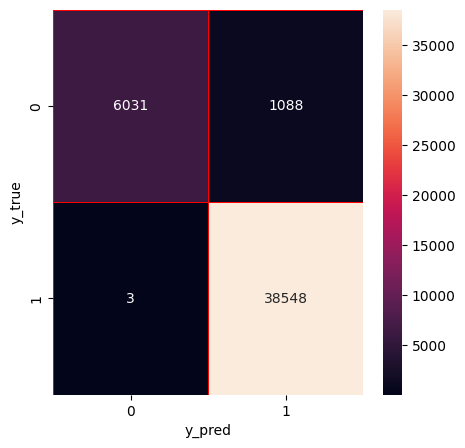

CPU times: user 1.95 s, sys: 79 ms, total: 2.03 s
Wall time: 1.95 s


In [ ]:
%%time
# LightGBM algorithm
import lightgbm as lgb
classifier = lgb.LGBMClassifier()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
print(classification_report(y_test,y_pred))
print("Accuracy: "+ str(accuracy_score(y_test, y_pred)))
print("Precision: "+str(precision_score(y_test, y_pred)))
print("Recall: "+str(recall_score(y_test, y_pred)))

# Plot the confusion matrix
cm=confusion_matrix(y_test,y_pred)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

# Hyperparameter optimization
Tune the hyperparameters of LightGBM to obtain optimal accuracy.

#### Optimize LightGBM by Bayesian Optimization with Tree-structured Parzen Estimator (BO-TPE)

In [ ]:
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials
from sklearn.model_selection import cross_val_score, StratifiedKFold

# Define the objective function
def objective(params):
    params = {
        'n_estimators': int(params['n_estimators']),
        'max_depth': int(params['max_depth']),
        'learning_rate': abs(float(params['learning_rate'])),
        "num_leaves": int(params['num_leaves']),
        "min_child_samples": int(params['min_child_samples']),
    }
    clf = lgb.LGBMClassifier( **params)
    clf.fit(X_train,y_train)
    prediction = clf.predict(X_test)
    score = accuracy_score(y_test,prediction)
    return {'loss':-score, 'status': STATUS_OK }

# Define the hyperparameter configuration space
space = {
    'n_estimators': hp.quniform('n_estimators', 50, 500, 20),
    'max_depth': hp.quniform('max_depth', 5, 50, 1),
    "learning_rate":hp.uniform('learning_rate', 0, 1),
    "num_leaves":hp.quniform('num_leaves',100,2000,100),
    "min_child_samples":hp.quniform('min_child_samples',10,50,5),
}

# Detect the optimal hyperparameter values
best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=50)
print("LightGBM: Hyperopt estimated optimum {}".format(best))

Streaming output truncated to the last 5000 lines.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

[LightGBM] [Info] Number of positive: 89556, number of negative: 17006
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.025291 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2414
[LightGBM] [Info] Number of data points in the train set: 106562, number of used features: 27
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.840412 -> initscore=1.661298
[LightGBM] [Info] Start training from score 1.661298
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

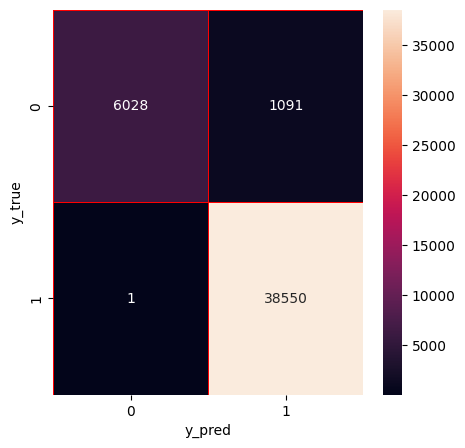

In [ ]:
# Use the optimal hyperparameter values to train the optimized LightGBM model
clf = lgb.LGBMClassifier(max_depth=10, learning_rate= 0.02177639768994022, n_estimators = 360,
                         num_leaves = 1600, min_child_samples = 35)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test,y_pred))
print("Accuracy: "+ str(accuracy_score(y_test, y_pred)))
print("Precision: "+str(precision_score(y_test, y_pred)))
print("Recall: "+str(recall_score(y_test, y_pred)))

# Plot the confusion matrix
cm=confusion_matrix(y_test,y_pred)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

#### Optimize LightGBM by particle swarm optimization (PSO)

In [ ]:
!pip install Optunity

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 10.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for Optunity: filename=Optunity-1.1.1-py3-none-any.whl size=72029 sha256=12e7b32cff40880e24d16678dc35e0275a109de85cb40d12559dd4913b13bcf6
  Stored in directory: /root/.cache/pip/wheels/83/98/40/b9956c3386a045f035f9edbf894edd04713db92f29fb58a225
Successfully built Optunity


In [ ]:
#PSO
import optunity
import optunity.metrics

# Define the hyperparameter configuration space
search = {
    'n_estimators': [50, 500],
    'max_depth': [5, 50],
    'learning_rate': (0, 1),
    "num_leaves":[100, 2000],
    "min_child_samples":[10, 50],
         }
# Define the objective function
def performance(n_estimators=None, max_depth=None,learning_rate=None,num_leaves=None,min_child_samples=None):
    clf = lgb.LGBMClassifier(n_estimators=int(n_estimators),
                                   max_depth=int(max_depth),
                                   learning_rate=float(learning_rate),
                                   num_leaves=int(num_leaves),
                                   min_child_samples=int(min_child_samples),
                                  )
    clf.fit(X_train,y_train)
    prediction = clf.predict(X_test)
    score = accuracy_score(y_test,prediction)
    return score

# Detect the optimal hyperparameter values
optimal_configuration, info, _ = optunity.maximize(performance,
                                                  solver_name='particle swarm',
                                                  num_evals=50,
                                                   **search
                                                  )
print(optimal_configuration)
print("Accuracy:"+ str(info.optimum))

Streaming output truncated to the last 5000 lines.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

[LightGBM] [Info] Number of positive: 89556, number of negative: 17006
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.039793 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2414
[LightGBM] [Info] Number of data points in the train set: 106562, number of used features: 27
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.840412 -> initscore=1.661298
[LightGBM] [Info] Start training from score 1.661298
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

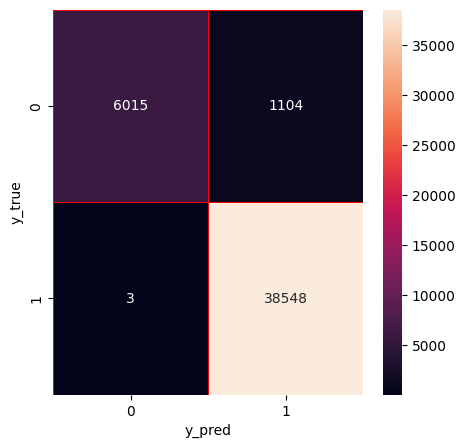

In [ ]:
clf = lgb.LGBMClassifier(max_depth=21, learning_rate= 0.012480468750000029, n_estimators = 225,
                         num_leaves = 747, min_child_samples = 46)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test,y_pred))
print("Accuracy: "+ str(accuracy_score(y_test, y_pred)))
print("Precision: "+str(precision_score(y_test, y_pred)))
print("Recall: "+str(recall_score(y_test, y_pred)))

# Plot the confusion matrix
cm=confusion_matrix(y_test,y_pred)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

After hyperparameter optimization, the accuracy of LightGBM can be slightly decreased from 99.61% to 97.57%. It is not much difference for Edge IIOT Dataset

### Save and load the optimized model

In [ ]:
import joblib
# Output a pickle file to save the trained model
joblib.dump(clf, 'Optimized_lightGBM.pkl')

['Optimized_lightGBM.pkl']

In [ ]:
# The trained model can be loaded directly for future testing
savestkrf = joblib.load('Optimized_lightGBM.pkl')

In [ ]:
y_pred = savestkrf.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[[ 6015  1104]
 [    3 38548]]
              precision    recall  f1-score   support

           0       1.00      0.84      0.92      7119
           1       0.97      1.00      0.99     38551

    accuracy                           0.98     45670
   macro avg       0.99      0.92      0.95     45670
weighted avg       0.98      0.98      0.97     45670

0.9757608933654478


## Checking if there is some drift

Changing train and test data percentages

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.1, test_size = 0.9, random_state = 0,shuffle=False)

[LightGBM] [Info] Number of positive: 12803, number of negative: 2420
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001961 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2151
[LightGBM] [Info] Number of data points in the train set: 15223, number of used features: 27
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.841030 -> initscore=1.665912
[LightGBM] [Info] Start training from score 1.665912
              precision    recall  f1-score   support

           0       0.96      0.86      0.90     21705
           1       0.97      0.99      0.98    115304

    accuracy                           0.97    137009
   macro avg       0.97      0.93      0.94    137009
weighted avg       0.97      0.97      0.97    137009

Accuracy: 0.9713084541891409
Precision: 0.9737381643087446
Recall: 0.9926802192465136


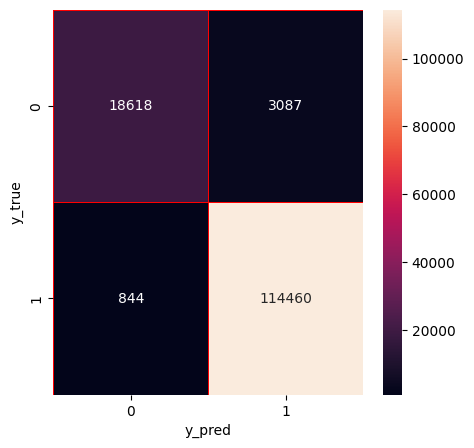

In [ ]:
# LightGBM algorithm
import lightgbm as lgb
classifier = lgb.LGBMClassifier()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
print(classification_report(y_test,y_pred))
print("Accuracy: "+ str(accuracy_score(y_test, y_pred)))
print("Precision: "+str(precision_score(y_test, y_pred)))
print("Recall: "+str(recall_score(y_test, y_pred)))

# Plot the confusion matrix
cm=confusion_matrix(y_test,y_pred)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

### Monitor how the accuracy changes over time

In [ ]:
# Record the real-time accuracy based on timestamp/sample index
acc = []
acc_sum = 0
size = y_train.size

for i in range(size, len(y)):
    if y_test[i] == y_pred[i-size]:
        acc_sum = acc_sum + 1
    j= i - size
    accuracy = acc_sum/(j+1)
    acc.append(accuracy)
    #print(accuracy)

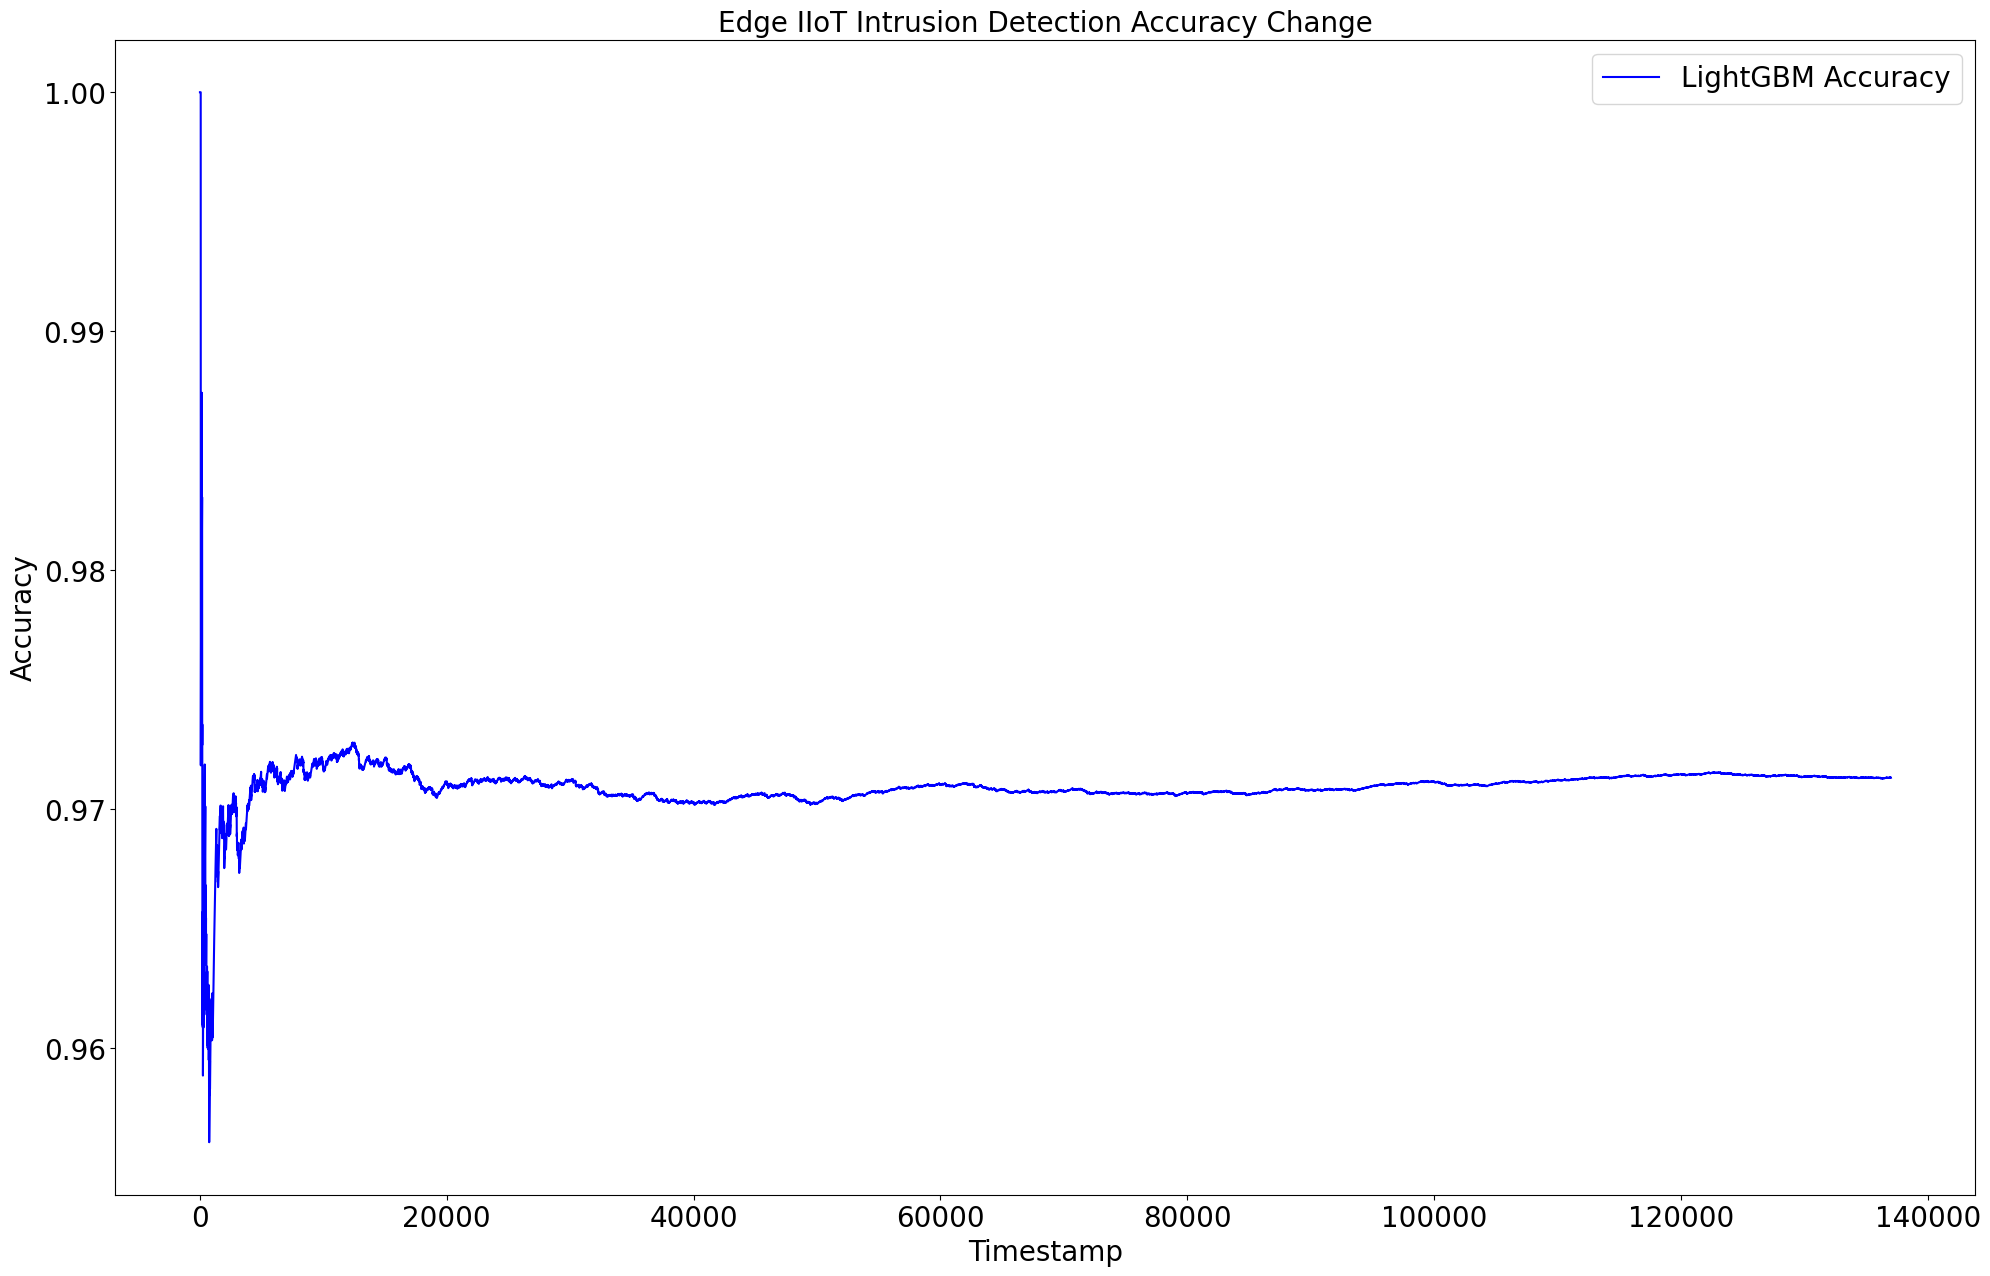

In [ ]:
# Plot the accuracy changes
plt.rcParams.update({'font.size': 20})
plt.figure(1,figsize=(24,15))
plt.clf()
plt.plot(acc,'-b',label='LightGBM Accuracy')

#plt.scatter(len(df1)-len(X_train),acc[len(X_test)-len(df1)],s=100,c='r')
#plt.text(len(df1)-len(X_train),acc[len(X_test)-len(df2)]+0.0005, 'test set starts', c='r')

plt.legend(loc='best')
plt.title('Edge IIoT Intrusion Detection Accuracy Change', fontsize=20)
plt.xlabel('Timestamp')
plt.ylabel('Accuracy')

plt.draw()

* The samples in the training set have similar statistical distribution. However, when the statistical distribution from the training set to the test set has changed. Hence, the model trained on the training set cannot accurately detect attacks in the test set.   
* In the figure, it can be seen that when the test set starts, the current accuracy starts to drop significantly due to the statistical distribution change in the dataset.  
* This kind of statistical distribution change is called **concept drift**.

In [ ]:
# Record the real-time precision based on timestamp/sample index
precision = []
true_positives = 0
false_positives = 0
size = y_train.size
for i in range(size, len(y)):
    if y_pred[i-size] == 1 and y_test[i] == 1:
        true_positives += 1
    elif y_pred[i-size] == 1 and y_test[i] == 0:
        false_positives += 1

    if true_positives + false_positives == 0:
        current_precision = 1  # To handle the case where there are no positive predictions made yet
    else:
        current_precision = true_positives / (true_positives + false_positives)

    precision.append(current_precision)

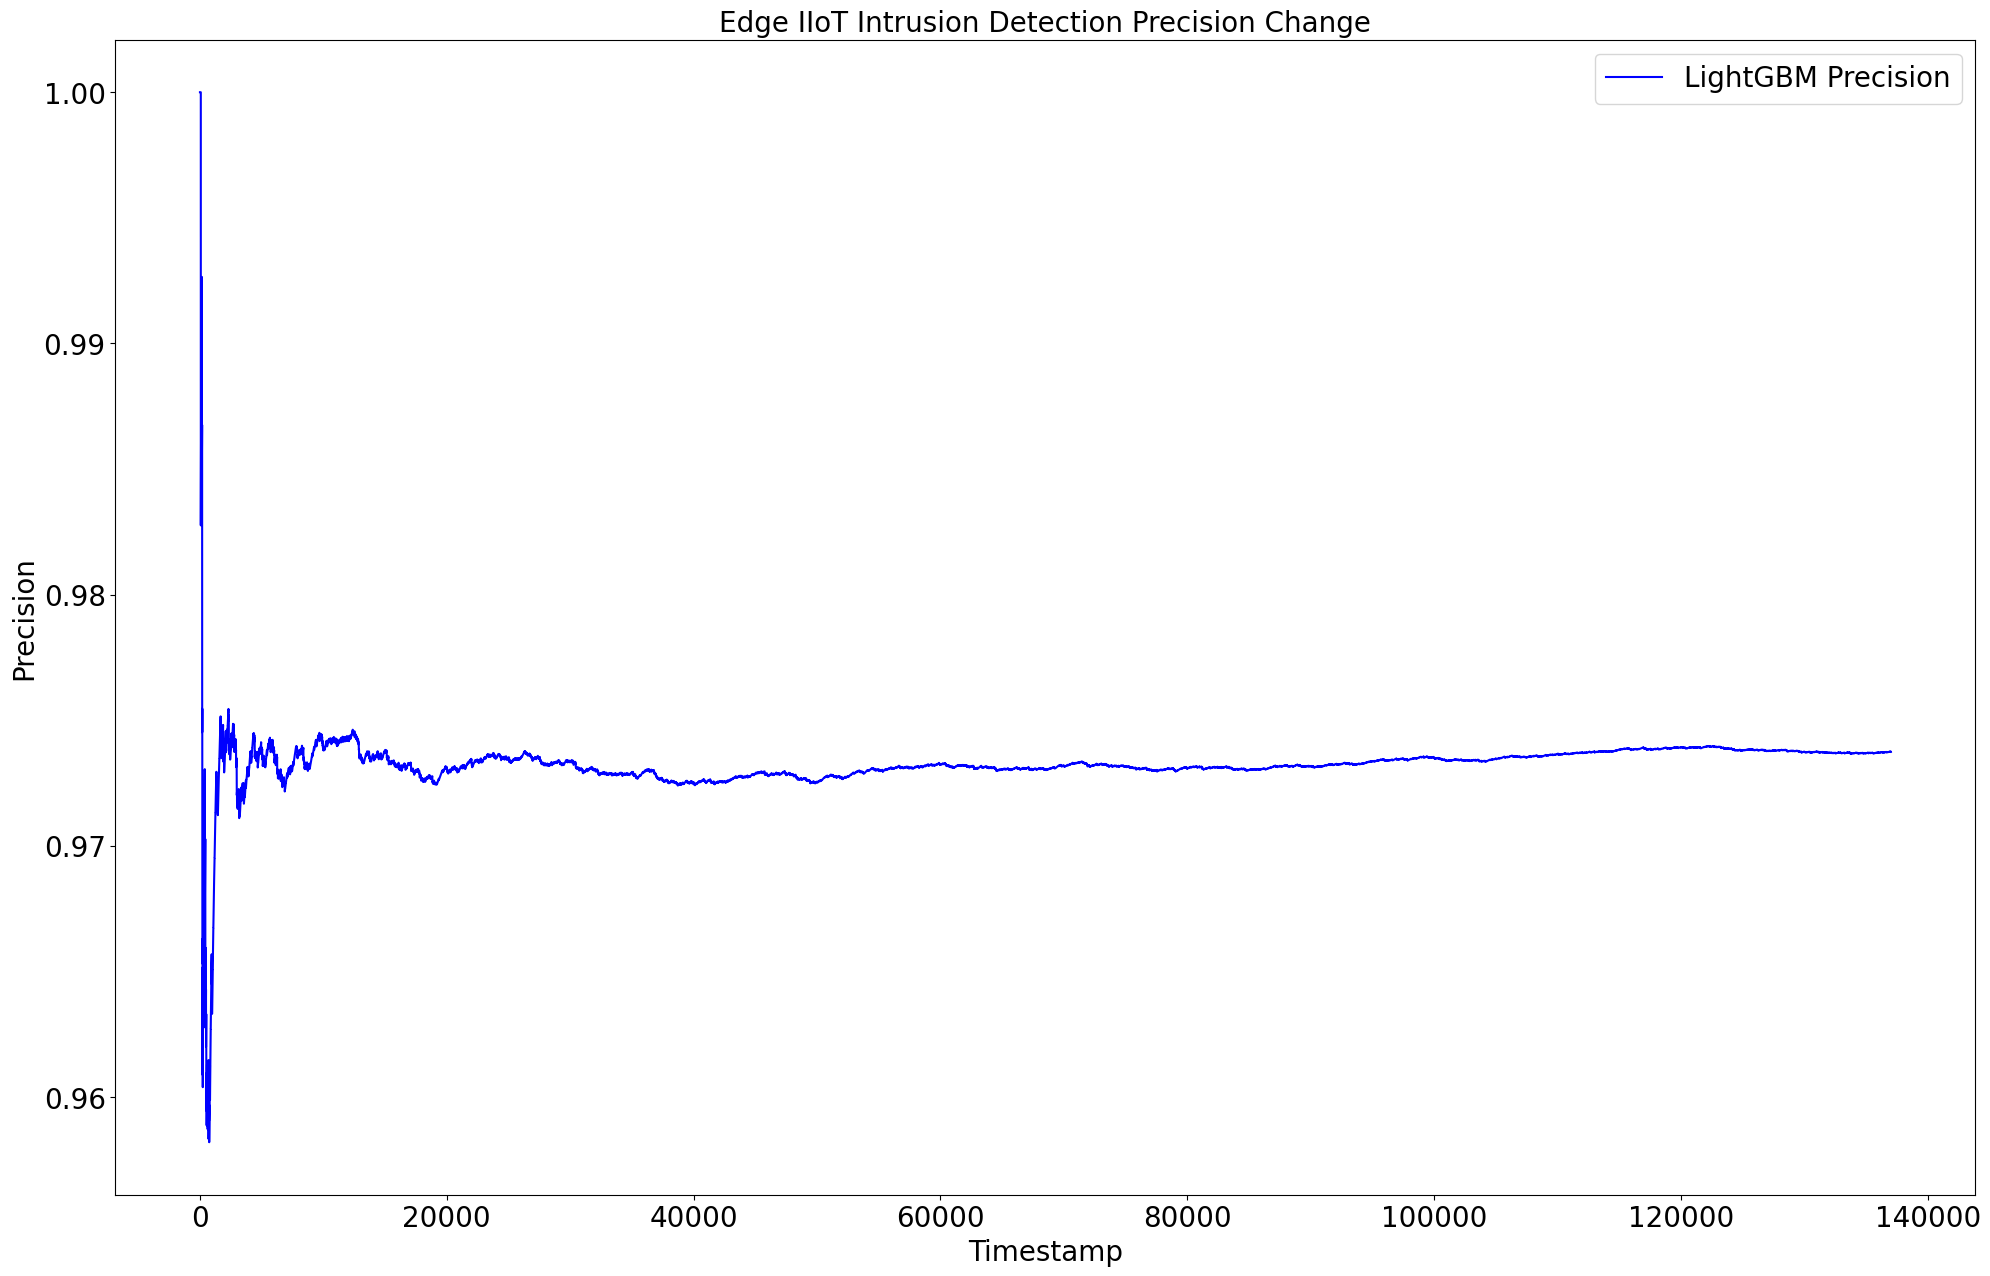

In [ ]:
# Plot the precision changes
plt.rcParams.update({'font.size': 20})
plt.figure(1,figsize=(24,15))
plt.clf()
plt.plot(precision,'-b',label='LightGBM Precision')

#plt.scatter(len(df1)-len(X_train),acc[len(X_test)-len(df2)],s=100,c='r')
#plt.text(len(df1)-len(X_train),acc[len(X_test)-len(df2)]+0.0005, 'test set starts', c='r')

plt.legend(loc='best')
plt.title('Edge IIoT Intrusion Detection Precision Change', fontsize=20)
plt.xlabel('Timestamp')
plt.ylabel('Precision')

plt.draw()

In [ ]:
recall = []
true_positives = 0
false_negatives = 0
size = y_train.size

for i in range(size, len(y)):
    if y_pred[i-size] == 1 and y_test[i] == 1:
        true_positives += 1
    elif y_pred[i-size] == 0 and y_test[i] == 1:
        false_negatives += 1

    if true_positives + false_negatives == 0:
        current_recall = 1  # To handle the case where there are no positive instances in the actual data yet
    else:
        current_recall = true_positives / (true_positives + false_negatives)

    recall.append(current_recall)

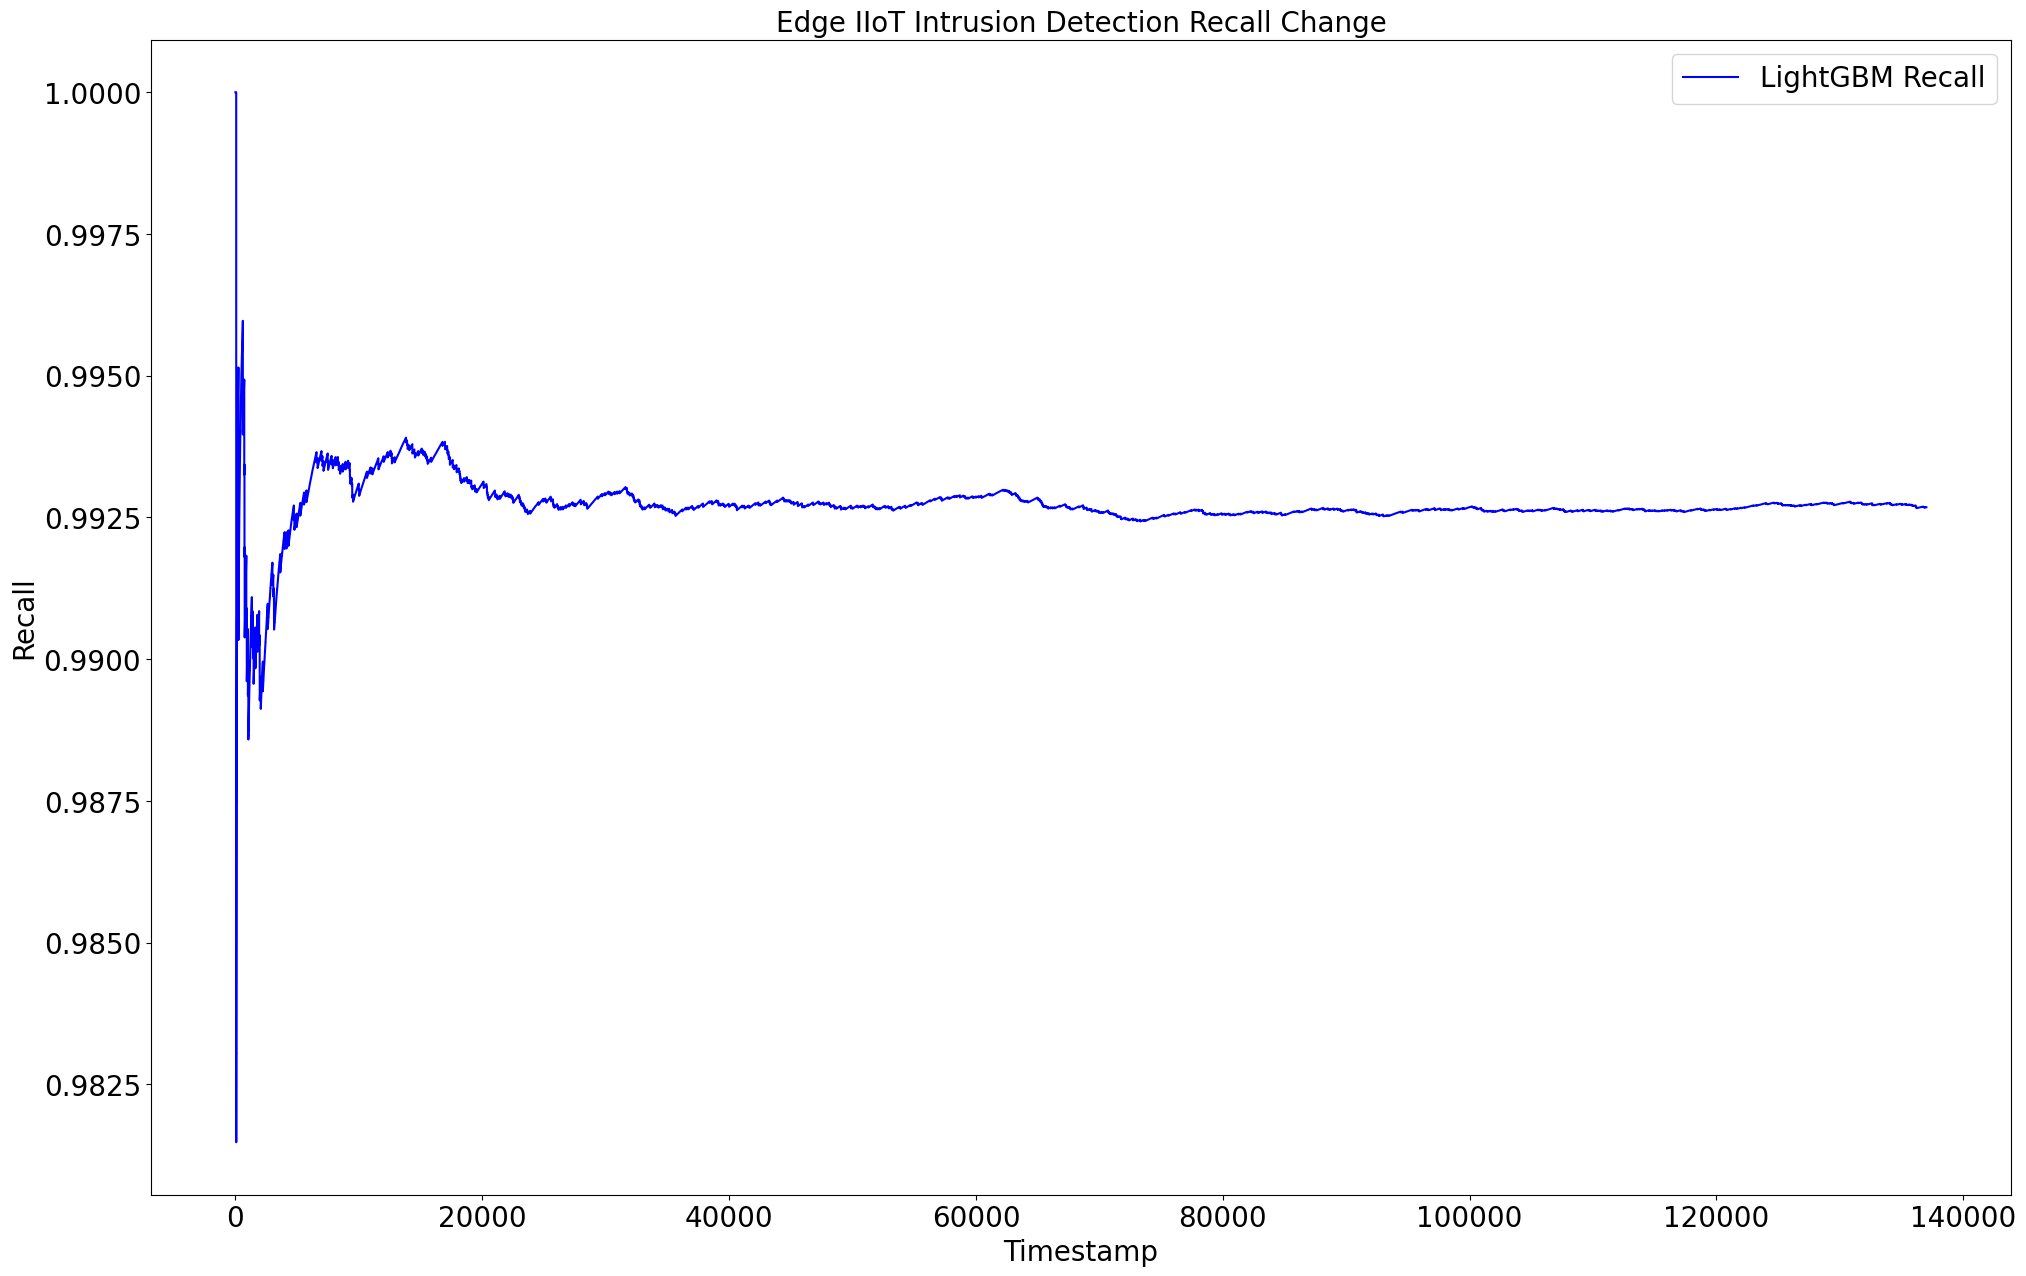

In [ ]:
# Plot the precision changes
plt.rcParams.update({'font.size': 20})
plt.figure(1,figsize=(24,15))
plt.clf()
plt.plot(recall,'-b',label='LightGBM Recall')

#plt.scatter(len(df1)-len(X_train),acc[len(X_test)-len(df2)],s=100,c='r')
#plt.text(len(df1)-len(X_train),acc[len(X_test)-len(df2)]+0.0005, 'test set starts', c='r')

plt.legend(loc='best')
plt.title('Edge IIoT Intrusion Detection Recall Change', fontsize=20)
plt.xlabel('Timestamp')
plt.ylabel('Recall')

plt.draw()